In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.0 MB 1.0 MB/s eta 0:06:12
   ---------------------------------------- 0.8/390.0 MB 1.2 MB/s eta 0:05:26
   ---------------------------------------- 1.3/390.0 MB 1.6 MB/s eta 0:04:10
   ---------------------------------------- 2.1/390.0 MB 2.4 MB/s eta 0:02:42
   ---------------------------------------- 4.2/390.0 MB 3.8 MB/s eta 0:01:42
    --------------------------------------- 5.2/390.0 MB 4.2 MB/s eta 0:01:32
    --------------------------------------- 5.2/390.0 MB 4.2 MB/s eta 0:01:32
    --------------------------------------- 6.0/390.0 MB 3.4 MB/s eta 0:01:55
    --------------------------------------- 6.3/390.0 MB 3.1 MB/s eta 0:02:05
    --------------------------------------- 6.3/390.0 MB 3.1 MB/s eta 0:02:05
    ---


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 1.5 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.1 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.1 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.1 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.1 MB 1.2 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.1 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.1 MB 1.2 MB/s eta 0:00:08
   -------- -----------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install pymongo


   ---------------------------------------- 0.0/781.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/781.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/781.4 kB ? eta -:--:--
   ------------- -------------------------- 262.1/781.4 kB ? eta -:--:--
   ------------- -------------------------- 262.1/781.4 kB ? eta -:--:--
   ---------------------------------------- 781.4/781.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from pymongo import MongoClient
import json

In [7]:
# MongoDB Connection
client = MongoClient("mongodb://localhost:27017/")
db = client["byner_analyzer"]
collection = db["predictions"]

In [8]:
# Simulated Data Extraction (Replace this with actual data fetching)
def generate_synthetic_data(size=1000):
    np.random.seed(42)
    return np.cumsum(np.random.randint(-5, 5, size))

In [9]:
# Generate Synthetic Data
sequence = generate_synthetic_data()

# Preprocessing
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sequence.reshape(-1, 1))
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [10]:
# Model Development
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

c:\Users\chamo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Training
model.fit(X, y, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1551
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9781e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1727e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4222e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3507e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3633e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9234e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0115e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4401e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9085e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3676e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1295e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0080e-04
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━━━

In [12]:
# Prediction
latest_sequence = X[-1].reshape(1, seq_length, 1)
predicted_value = model.predict(latest_sequence)
predicted_value = scaler.inverse_transform(predicted_value.reshape(-1, 1))[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [16]:
data_entry = {
    "historical_sequence": sequence.tolist(),
    "predicted_value": float(predicted_value),  # Convert NumPy float to Python float
}
collection.insert_one(data_entry)


InsertOneResult(ObjectId('679c96dcfb00b21f8d7a95dc'), acknowledged=True)

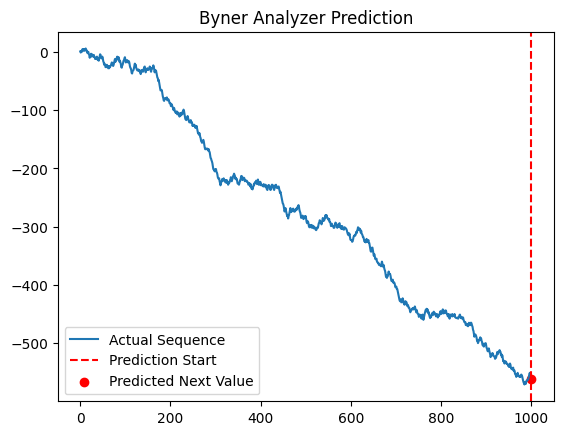

In [17]:
# Visualization
plt.plot(sequence, label="Actual Sequence")
plt.axvline(len(sequence)-1, color='r', linestyle='--', label="Prediction Start")
plt.scatter(len(sequence), predicted_value, color='red', label="Predicted Next Value")
plt.legend()
plt.title("Byner Analyzer Prediction")
plt.show()

In [18]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
print(f"MSE: {mse}, MAE: {mae}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
MSE: 0.0007563694261071913, MAE: 0.020687059093402498
